Import necessary libraries:

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### At first, I will load data and check if it needs cleaning

I load data from _.csv_ file:

In [37]:
df = pd.read_csv("abalone.csv", sep=',')

I make a copy :)

In [38]:
df_copy = df.copy(deep = True)

And look what do we have here:

In [39]:
df_copy.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,senior abalone
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,mature abalone
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,mature abalone
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,middle-aged abalone
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,mature abalone


So, first thing to do is to **change strings to integers**.  

Let's see what how many categories we have in _Age group_:

In [40]:
df_copy.groupby(['Age group']).size()

Age group
mature abalone         1648
middle-aged abalone    1388
senior abalone          693
young abalone           448
dtype: int64

#### Now I change strings to integers  in _Age group_:
I could do this automatically using LabelEncoder, but I want to have values growing with the age, as below: 
- young -> 1
- mature -> 2
- middle-age -> 3
- senior -> 4  


So, I will change it 'by hand' ;)

In [41]:
d = {'young abalone':1,'mature abalone':2,'middle-aged abalone':3, 'senior abalone':4}
df_copy = df_copy.replace(d)

Does it work?

In [42]:
df_copy.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,4
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,3
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


Yup! No it's time for _Sex_ feature:

In [43]:
df_copy.groupby(['Sex']).size()

Sex
F    1307
I    1342
M    1528
dtype: int64

Here numbers can be selected randomly, so I will change it using LabelEncoder :)

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [45]:
df_copy['Sex'] = le.fit_transform(df_copy['Sex'])

Does this method work too?

In [34]:
df_copy.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,4
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,2
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,3
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,2


Yes! :)

### Next I will check some informations:

Shape:

In [46]:
df_copy.shape

(4177, 10)

Basic informations:

In [47]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
Sex               4177 non-null int64
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole weight      4177 non-null float64
Shucked weight    4177 non-null float64
Viscera weight    4177 non-null float64
Shell weight      4177 non-null float64
Rings             4177 non-null int64
Age group         4177 non-null int64
dtypes: float64(7), int64(3)
memory usage: 326.4 KB


I check if there are any null objects:

In [49]:
df_copy.isnull().values.any()

False

And check how many duplicates do we have:

In [50]:
df_copy.duplicated().sum()

0

Let's see basic statistics:

In [48]:
df_copy.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.052909,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,2.556859
std,0.822240,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.890664
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,2.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,2.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,3.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,4.000000


#### It looks like we can have some outliers in _Height_, _Shucked weight_ and _Shell weight_.  
Check it out!

#### Height

In [51]:
df_copy.groupby(['Height']).size()

Height
0.000      2
0.010      1
0.015      2
0.020      2
0.025      5
0.030      6
0.035      6
0.040     13
0.045     11
0.050     18
0.055     25
0.060     26
0.065     39
0.070     47
0.075     61
0.080     76
0.085     74
0.090    124
0.095     91
0.100    145
0.105    114
0.110    135
0.115    133
0.120    169
0.125    202
0.130    169
0.135    189
0.140    220
0.145    182
0.150    267
0.155    217
0.160    205
0.165    193
0.170    160
0.175    211
0.180    131
0.185    103
0.190    103
0.195     78
0.200     68
0.205     45
0.210     23
0.215     31
0.220     17
0.225     13
0.230     10
0.235      6
0.240      4
0.250      3
0.515      1
1.130      1
dtype: int64

There are to zeros (0.000) and one 1.130. In my opinion all three values are not correct.  
What I can do with it is to replace values by e.g. mean or I can just drop these rows.  
We have more than 4000 observations, so if I drop 3 rows it will not make big difference.

So, which rows should I drop?

In [52]:
height_outliers = ['0.000', '1.130']

df_copy.loc[df_copy['Height'].isin(height_outliers)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
1257,1,0.430,0.340,0.00,0.428,0.2065,0.0860,0.1150,8,2
2051,0,0.455,0.355,1.13,0.594,0.3320,0.1160,0.1335,8,2
3996,1,0.315,0.230,0.00,0.134,0.0575,0.0285,0.3505,6,1


Ok, let's do this:

In [57]:
to_drop = [1257,2051,3996]
df_copy.drop(to_drop, inplace=True, axis=0)

Did it work?

In [58]:
df_copy.loc[df_copy['Height'].isin(height_outliers)]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group


Yes, it's quite clean here ;)

#### Shucked weight

In [60]:
df_copy.groupby(['Shucked weight']).size()

Shucked weight
0.0010    1
0.0025    1
0.0045    2
0.0050    3
0.0055    2
0.0065    3
0.0070    1
0.0075    4
0.0080    1
0.0085    1
0.0090    3
0.0095    4
0.0100    1
0.0105    2
0.0110    3
0.0115    1
0.0120    2
0.0125    5
0.0130    1
0.0135    2
0.0145    2
0.0150    1
0.0155    3
0.0165    2
0.0170    2
0.0175    1
0.0180    2
0.0185    1
0.0190    3
0.0200    2
         ..
1.0515    1
1.0615    1
1.0685    1
1.0705    1
1.0715    1
1.0745    1
1.0815    1
1.0830    1
1.0950    1
1.1055    1
1.1075    1
1.1090    1
1.1155    1
1.1280    1
1.1330    1
1.1335    1
1.1455    2
1.1465    1
1.1495    1
1.1565    1
1.1705    1
1.1945    1
1.1965    1
1.2320    1
1.2395    2
1.2455    1
1.2530    1
1.3485    1
1.3510    1
1.4880    1
Length: 1515, dtype: int64

Hmm, these values look good. Nothing to change.

#### Shell weight

In [61]:
df_copy.groupby(['Shell weight']).size()

Shell weight
0.0015     1
0.0030     1
0.0035     1
0.0040     2
0.0050    12
0.0060     1
0.0065     1
0.0070     1
0.0075     1
0.0080     4
0.0085     1
0.0090     4
0.0095     2
0.0100    10
0.0105     2
0.0110     3
0.0120     2
0.0125     2
0.0130     3
0.0135     1
0.0140     2
0.0150     9
0.0155     2
0.0160     2
0.0170     2
0.0180     3
0.0185     1
0.0190     1
0.0195     1
0.0200    12
          ..
0.6300     1
0.6350     1
0.6380     1
0.6420     1
0.6430     1
0.6460     1
0.6500     1
0.6550     1
0.6570     1
0.6585     1
0.6600     1
0.6650     2
0.6745     1
0.6750     1
0.6785     1
0.6850     1
0.6855     1
0.6900     1
0.7000     1
0.7100     2
0.7250     3
0.7260     1
0.7600     1
0.7800     1
0.7975     1
0.8150     1
0.8500     1
0.8850     2
0.8970     1
1.0050     1
Length: 925, dtype: int64

This feature also is ok. 

## How looks our data after cleaning?

In [66]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4174 entries, 0 to 4176
Data columns (total 10 columns):
Sex               4174 non-null int64
Length            4174 non-null float64
Diameter          4174 non-null float64
Height            4174 non-null float64
Whole weight      4174 non-null float64
Shucked weight    4174 non-null float64
Viscera weight    4174 non-null float64
Shell weight      4174 non-null float64
Rings             4174 non-null int64
Age group         4174 non-null int64
dtypes: float64(7), int64(3)
memory usage: 358.7 KB


In [67]:
df_copy.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age group
count,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000,4174.000000
mean,1.053186,0.524081,0.407953,0.139346,0.829061,0.359483,0.180668,0.238859,9.935553,2.557499
std,0.822374,0.120079,0.099228,0.038811,0.490395,0.221980,0.109614,0.139219,3.224474,0.890574
min,0.000000,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.442125,0.186125,0.093500,0.130000,8.000000,2.000000
50%,1.000000,0.545000,0.425000,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,2.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153750,0.502000,0.253000,0.328875,11.000000,3.000000
max,2.000000,0.815000,0.650000,0.515000,2.825500,1.488000,0.760000,1.005000,29.000000,4.000000


### Histograms time :)

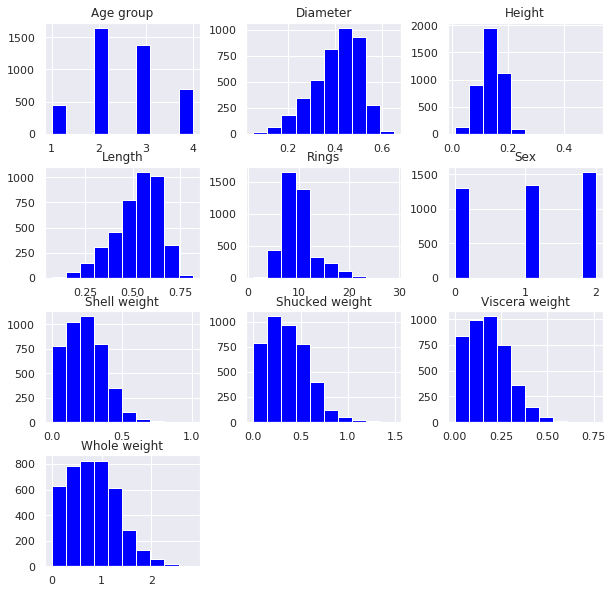

In [68]:
sns.set()
df_copy.hist(figsize=(10,10), color='blue')
plt.show()

### Scatter matrix

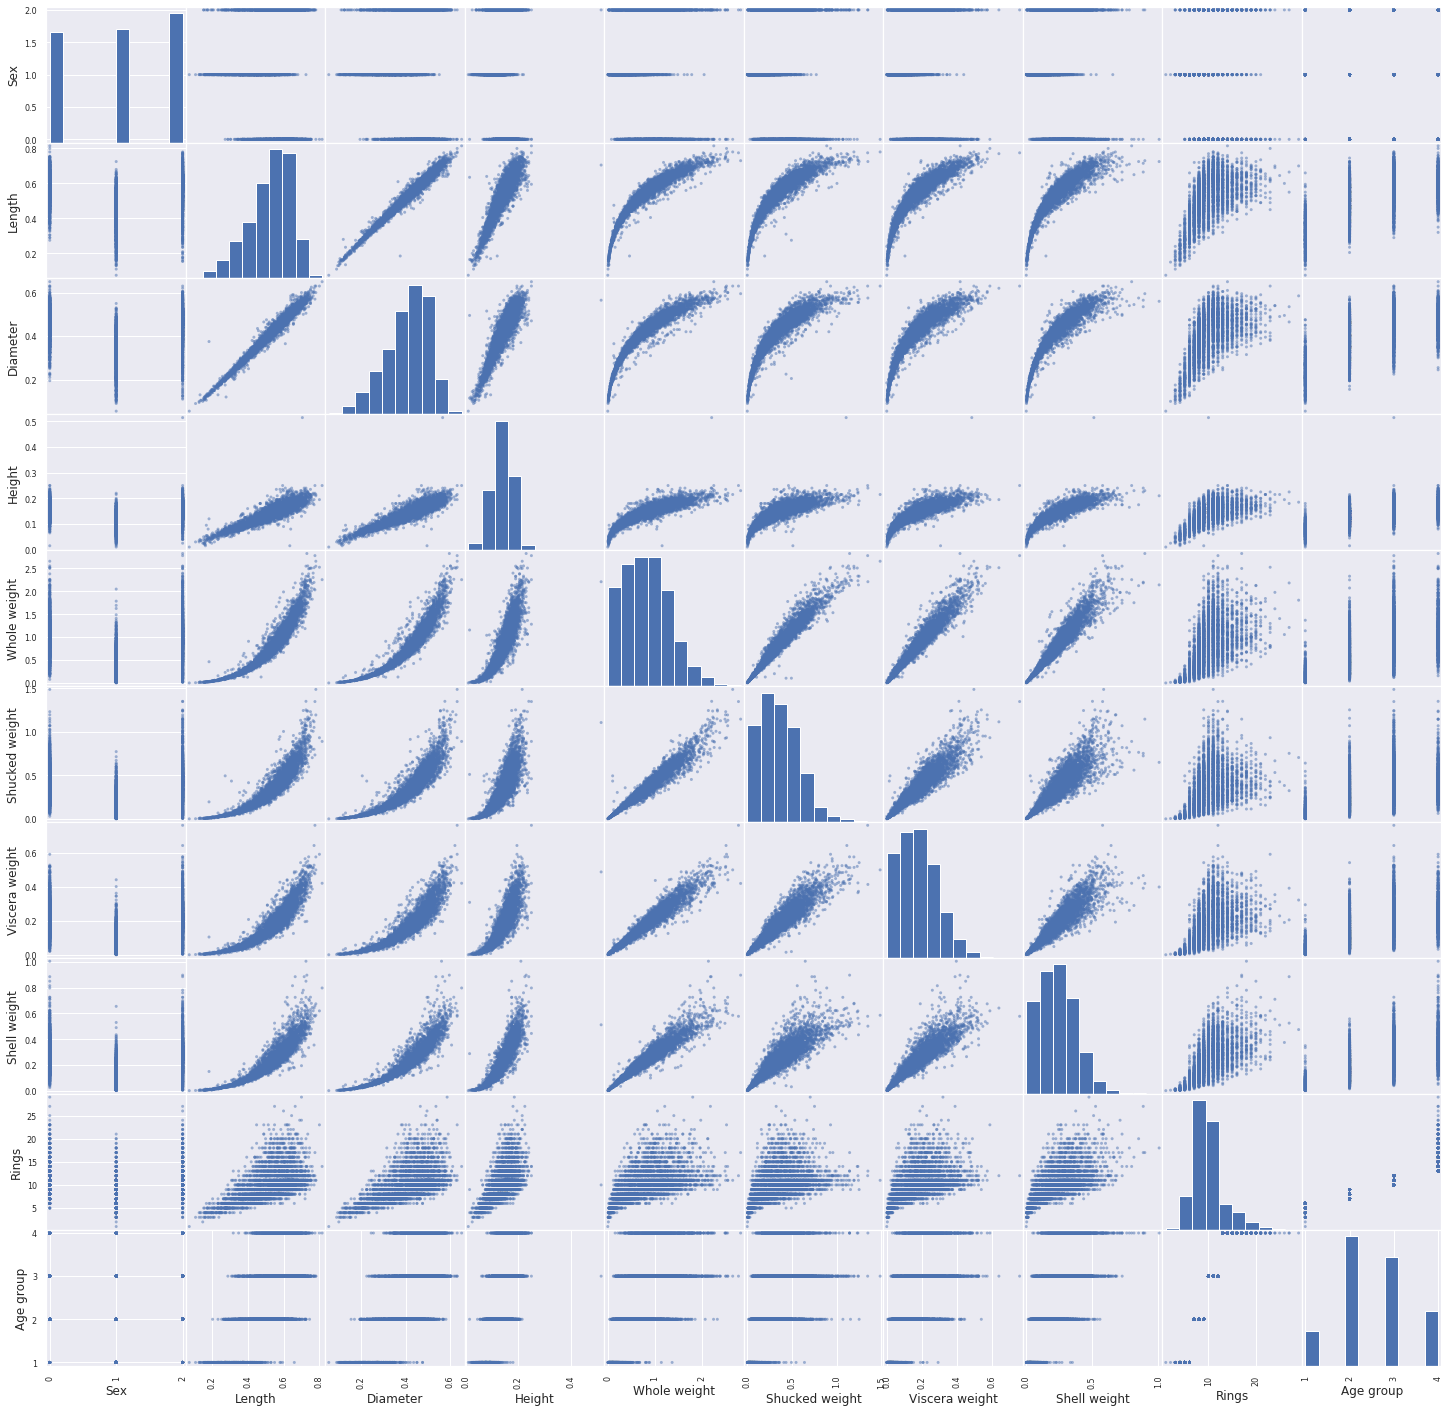

In [69]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df_copy,figsize=(25, 25))

Whoah! :o  
Can't wait to see correlations!

But at first I'll check how does look _Age Group_ in here:

/home/katarzyna/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/katarzyna/.local/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


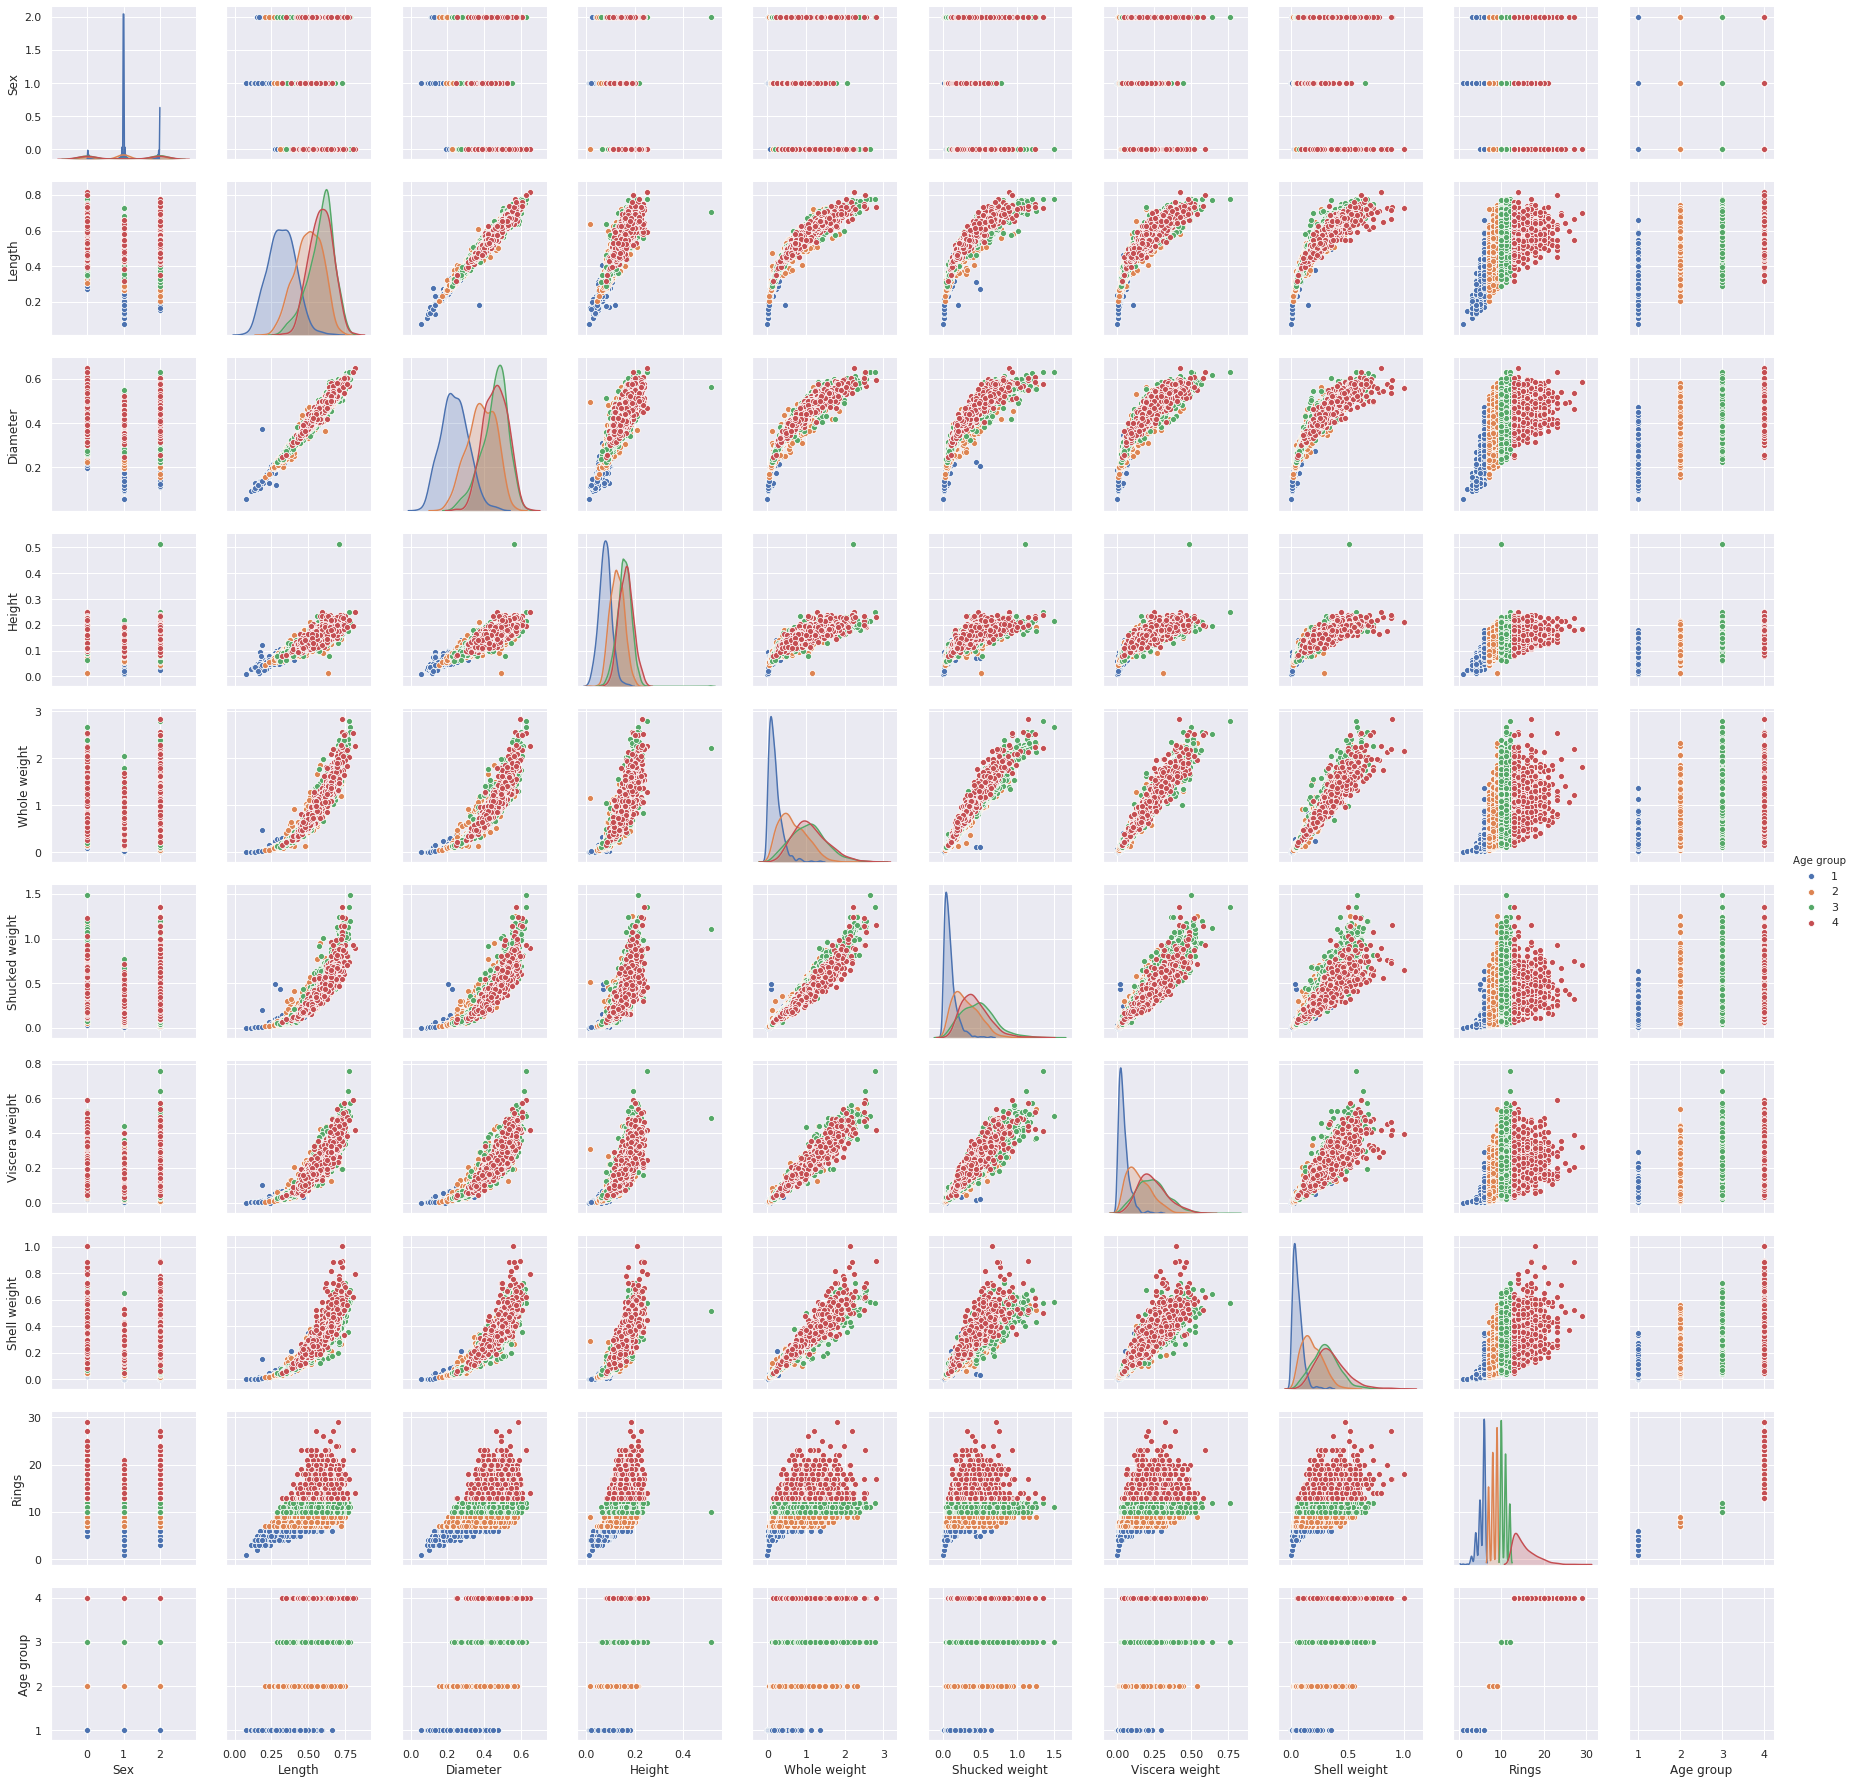

In [70]:
p=sns.pairplot(df_copy, hue = 'Age group')

### Correlation

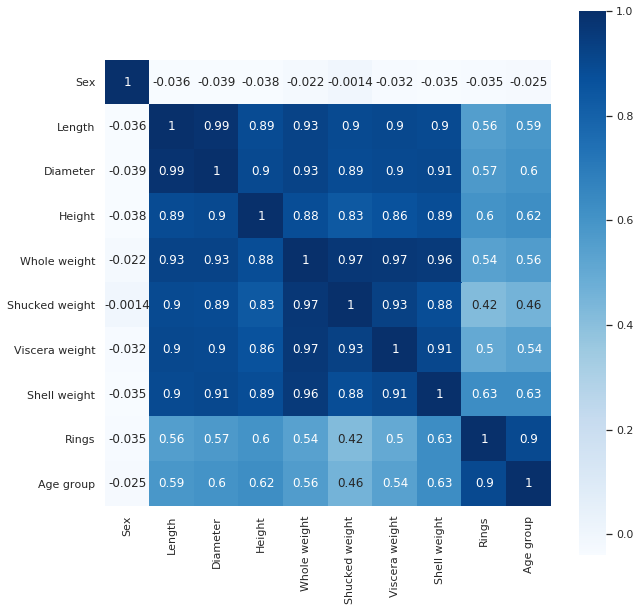

In [71]:
correlation = df_copy.corr()

import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

Wow! Almost every pair of features (without _Sex_) has a strong positive correlation (corr > 0.41)! It's important information when we are creating a model.

#### So, our target is to categorize abalones to correct age group based on the feature other than number of rings. Except _Rings_, the most correlated with _Age group_ features are: 
- _Shell weight_, correlation = 0.63
- _Height_, correlation = 0.62

Diameter and length have also comparable correlations (0.6 and 0.59), but I will focus on these two above. I don't want to use too many features, especially that all of them have quite strong and strong correlations with each other. Model can give incorrect results if features which were used are correlated.

#### Remember, that _Shell weight_ and _Height_ are strongly correlated  (correlation = 0.89)!!!

## Models

All models which I will create:
* are **classifiers**, not regressors - _it is because our target feature, Age group, contains a division into classes, it is not continuous,_
* have test size = 0.2,
* have random state = 42.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

### Model uwzgleniajacy 'shell weight', test size = 1/3

Zaczynam od okrelenia X i y:

In [19]:
X = df_copy['Shell weight']
y = df_copy['Age group']

In [20]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [21]:
X

array([[0.15 ],
       [0.07 ],
       [0.21 ],
       ...,
       [0.308],
       [0.296],
       [0.495]])

In [22]:
y

array([[4],
       [2],
       [2],
       ...,
       [2],
       [3],
       [3]])

Okreslam wielkosc prob, uwzgledniam kroswalidacje:

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [24]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

Optymalna liczba 'sasiadow' wedlug proby treningowej

In [25]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 60.84770114942529 % and k = [1]


Optymalna liczba 'sasiadow' wedlug proby testowej, uzyje jej w modelu:

In [26]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 57.78894472361809 % and k = [27]


Tu wizualizacja powyzszych :)

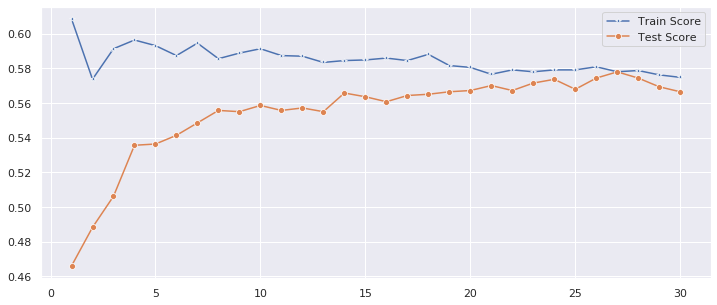

In [27]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

W zwiazku z tym, ze najlepszy wynik jest dla 27 'sasiadow', uzywam tej liczby w modelu:

In [28]:
knn = KNeighborsClassifier(27)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5778894472361809

In [29]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Sprawdzam bledy:

In [30]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4644651830581479
Mean Squared Error: 0.5491744436468055
Root Mean Squared Error: 0.7410630497108903


I kroswalidacje, chociaz z reguly nie robi sie jej dla tak duzych danych. To bardziej w ramach ciekawostki :)

In [31]:
from sklearn.model_selection import cross_val_score
cross_val = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

Wyniki kroswalidacji to [0.53571429 0.53571429 0.54121864 0.56272401 0.54121864 0.50719424
 0.52517986 0.53956835 0.57039711 0.54347826]
Sredni wynik kroswalidacji to 0.5402407680577241


Teraz troche pokombinuje jak zwiekszyc dokladnosc modelu :)

### Model uwzgleniajacy 'shell weight', test size = 1/4

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=42, stratify=y)

In [33]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

In [34]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 60.664112388250324 % and k = [1]


In [35]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 57.51196172248804 % and k = [28, 29]


Zmienila sie optymalna liczba sasiadow :)

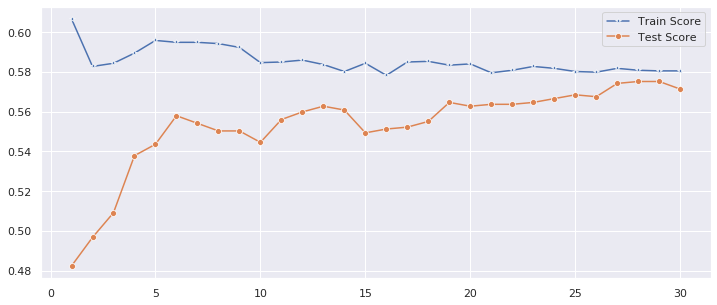

In [36]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [37]:
knn = KNeighborsClassifier(29)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5751196172248804

In [38]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [39]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4698564593301435
Mean Squared Error: 0.5598086124401914
Root Mean Squared Error: 0.7482035902347646


In [40]:
cross_val = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

Wyniki kroswalidacji to [0.53968254 0.52866242 0.5477707  0.57324841 0.50636943 0.58598726
 0.56089744 0.53846154 0.54487179 0.55948553]
Sredni wynik kroswalidacji to 0.5485437056020442


Hmm, nie tedy droga. Po zmniejszeniu proby testowej dokladnosc zmalala.

### Model uwzgleniajacy 'shell weight', test size = 2/5

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=2/5,random_state=42, stratify=y)

In [42]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

In [43]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 62.45011971268954 % and k = [3]


In [44]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 56.732495511669654 % and k = [27]


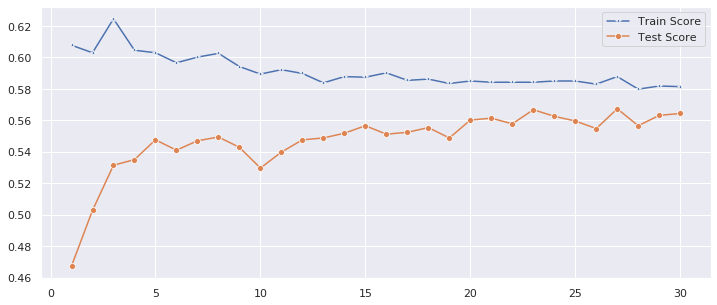

In [45]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [46]:
knn = KNeighborsClassifier(27)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5673249551166966

In [47]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [48]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4799521244763615
Mean Squared Error: 0.5757031717534411
Root Mean Squared Error: 0.7587510604628116


In [49]:
cross_val = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

Wyniki kroswalidacji to [0.51587302 0.52380952 0.51984127 0.56175299 0.57370518 0.5936255
 0.52       0.568      0.54618474 0.52016129]
Sredni wynik kroswalidacji to 0.5442953504140859


/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

Zmieniajac wielkosc proby testowej nie udalo mi sie w tych dwoch probach poprawic dokladnosci. 
Przechodze do modelu z nastepna cecha.

### Model uwzgleniajacy 'diameter', test size = 1/3

In [50]:
X = df_copy['Diameter']
y = df_copy['Age group']

In [51]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [52]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [53]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

In [54]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 53.23275862068966 % and k = [30]


In [55]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 51.543431442928934 % and k = [19]


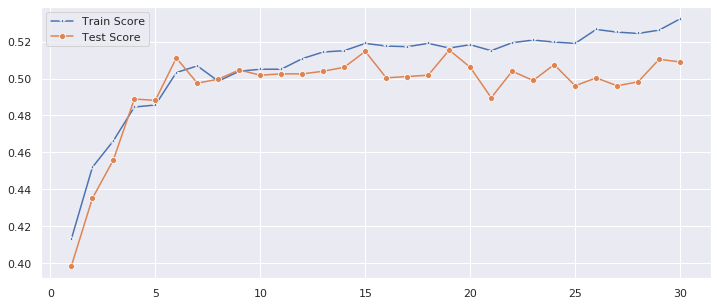

In [56]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [57]:
knn = KNeighborsClassifier(19)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5154343144292893

In [58]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [59]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5886575735821967
Mean Squared Error: 0.7968413496051687
Root Mean Squared Error: 0.8926597053777933


In [60]:
cross_val = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

Wyniki kroswalidacji to [0.53571429 0.52142857 0.50537634 0.49462366 0.52688172 0.46402878
 0.51438849 0.54676259 0.54512635 0.4673913 ]
Sredni wynik kroswalidacji to 0.5121722091826512


/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

### Model uwzgleniajacy 'diameter', test size = 1/4

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=42, stratify=y)

In [62]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

In [63]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 54.629629629629626 % and k = [30]


In [64]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 55.406698564593306 % and k = [30]


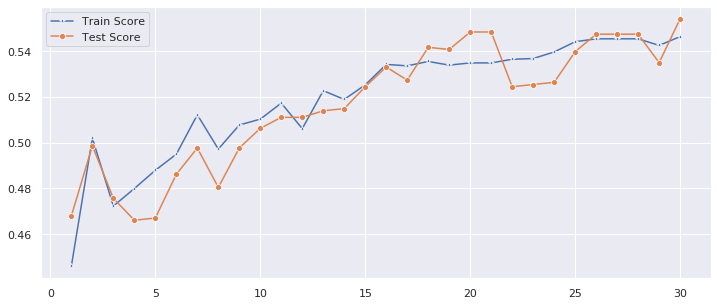

In [65]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [66]:
knn = KNeighborsClassifier(30)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.554066985645933

In [67]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5167464114832536
Mean Squared Error: 0.6583732057416268
Root Mean Squared Error: 0.811402000084808


In [69]:
cross_val = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

Wyniki kroswalidacji to [0.46349206 0.50318471 0.52866242 0.52547771 0.51910828 0.57961783
 0.55448718 0.49358974 0.5224359  0.50482315]
Sredni wynik kroswalidacji to 0.5194878990544299


No prosze, w tym przypadku zmniejszenie proby testowej poprawilo dokladnosc :)

### Model uwzgleniajacy 'diameter', test size = 1/2 - tak troche z ciekawosci, wiem ze nie moze byc taka duza.

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/2,random_state=42, stratify=y)

In [71]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

In [72]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 55.220306513409966 % and k = [27]


In [73]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 53.135471517472475 % and k = [14]


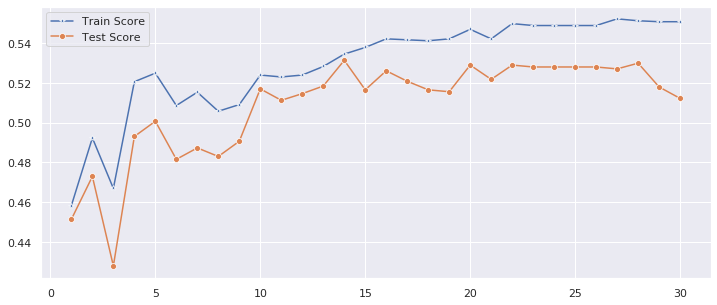

In [74]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [75]:
knn = KNeighborsClassifier(14)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.5313547151747248

In [76]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [77]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5528961225466731
Mean Squared Error: 0.7213977979894687
Root Mean Squared Error: 0.8493513984149721


In [78]:
cross_val = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

Wyniki kroswalidacji to [0.48341232 0.52132701 0.54028436 0.49763033 0.49038462 0.50480769
 0.54589372 0.48309179 0.50724638 0.57004831]
Sredni wynik kroswalidacji to 0.5144126529365042


/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


Spodziewalam sie wiekszego spadku dokladnosci.

### Dodatkowo KNN uwzgledniajacy obie cechy :) - tak, nie robimy tego na produkcji, jezeli sa ze soba skorelowane!

In [79]:
X = df_copy[['Shell weight','Diameter']]
y = df_copy['Age group']

In [80]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [82]:
test_scores = []
train_scores = []

for i in range(1,31):  

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: Data

In [83]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 86.56609195402298 % and k = [1]


In [84]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 60.80402010050251 % and k = [28]


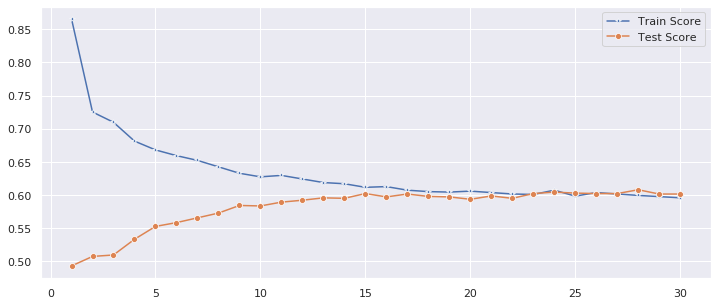

In [85]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,31),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,31),test_scores,marker='o',label='Test Score')

In [86]:
knn = KNeighborsClassifier(28)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.6080402010050251

In [87]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [88]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4271356783919598
Mean Squared Error: 0.49748743718592964
Root Mean Squared Error: 0.7053278933842966


In [89]:
cross_val = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

Wyniki kroswalidacji to [0.55714286 0.55357143 0.58064516 0.56630824 0.58422939 0.54316547
 0.56834532 0.58992806 0.59205776 0.56884058]
Sredni wynik kroswalidacji to 0.570423427177707


/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConv

No, dokladnosc wyszla najwieksza ze wszystkich do tej pory, ale jak wczesniej wspomnialam - wyniki moga byc zaklamane przez silna korelacje miedzy zmiennymi zaleznymi (cor=0.91) :) 

Dodatkowo wykresy nie sa zbiezne, a powinny jednak oscylowac wokol siebie. To sugeruje zly bilans targetu w grupiach testowych i treningowych.

### Podsumowanie KNN: 
#### - najwyzsza dokladnosc KNN  (pomijajac ta uwzgledniajaca wplyw obu cech) udalo mi sie uzyskac uwzgledniajac w modelu z ceche 'shell weight' przy wielkosci proby testowej 1/3 (accuracy = 0.5778).
#### - ogolnie wyniki dla parametru 'shell weight' byly lepsze nic dla 'diameter', jest to zwiazane z nieco lepsza korelacja z 'age group (0.63 vs. 0.61): wyzsze dokladnosci, mniejsze bledy (MSE itd), wyzsze kroswalidacje (choc nimi sie akurat nie sugeruje).

## Random Forest

In [90]:
from sklearn.ensemble import RandomForestClassifier

### Model uwzgledniajacy 'shell weight'

In [91]:
X = df_copy['Shell weight']
y = df_copy['Age group']

In [92]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [94]:
model = RandomForestClassifier(n_estimators=100) 

model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
model.score(X_test, y_test)

0.5157894736842106

In [96]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [97]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5330143540669856
Mean Squared Error: 0.6421052631578947
Root Mean Squared Error: 0.8013147091860318


In [98]:
cross_val = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConvers

Wyniki kroswalidacji to [0.52380952 0.49363057 0.53354633 0.54313099 0.54313099 0.5686901
 0.51118211 0.51757188 0.53035144 0.53525641]
Sredni wynik kroswalidacji to 0.5300300341180156


Ok, nie przekopiowywalam kodu, ale zaczynalam od proby testowej 0.2 i liczby drzew = 5. 
Probowalam sporo roznych kombinacji, ta wyszla najlepiej. 
Najgorszy wynik dokladnosci wynosil ok 0.488 dla 300 drzew i proby testowej 0.25).

### Model uwzgledniajacy 'diameter'

In [99]:
X = df_copy['Diameter']
y = df_copy['Age group']

In [100]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.24, random_state=42)

In [102]:
model = RandomForestClassifier(n_estimators=220) 

model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=220,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [103]:
model.score(X_test, y_test)

0.5443668993020937

In [104]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [105]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.514456630109671
Mean Squared Error: 0.650049850448654
Root Mean Squared Error: 0.8062566901729585


In [106]:
cross_val = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConvers

Wyniki kroswalidacji to [0.55       0.55172414 0.53291536 0.4984326  0.52681388 0.5221519
 0.53481013 0.5221519  0.55063291 0.54746835]
Sredni wynik kroswalidacji to 0.5337101170313081


Tu tak samo jak wyzej, sprawdzalam dokladnosc dla roznych kombinacji, proba testowa 0.24 i 220 drzew wypadlo najlepiej :)

### Kolejna proba przy uzyciu obu zmiennych! 

In [107]:
X = df_copy[['Diameter', 'Shell weight']]
y = df_copy['Age group']

In [108]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [110]:
model = RandomForestClassifier(n_estimators=250) 

model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [111]:
model.score(X_test, y_test)

0.5466507177033493

In [112]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [113]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5263157894736842
Mean Squared Error: 0.6674641148325359
Root Mean Squared Error: 0.8169847702573995


In [114]:
cross_val = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
print('Wyniki kroswalidacji to {}'.format(cross_val))
print('Sredni wynik kroswalidacji to {}'.format(cross_val.mean()))

/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/katarzyna/.local/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:514: DataConvers

Wyniki kroswalidacji to [0.51335312 0.51785714 0.50447761 0.50898204 0.49700599 0.53453453
 0.48348348 0.53453453 0.51651652 0.55255255]
Sredni wynik kroswalidacji to 0.5163297516098162


Po przeklikaniu roznych kombinacji duzo latwiej jest mi uzyskac dokladnosc ok 0.55, niemniej ze wzgledu na korelacje miedzy shell weight a diameter - nie bierzemy takiego modelu na powazne :)

### Podsumowanie RF:
#### Najwieksza dokladnosc modelu Random Forest udalo mi sie uzyskac wykorzystujac w modelu ceche 'diameter', ustawiajac wielkosc proby testowej na 0.24 a liczbe drzew - 220. Jest to dla mnie troche zaskakujace, spodziewalam sie odwrotnego wyniku ze wzgledu na korelacje. Moze byc jednak tak, ze nie udalo mi sie znalezc optymalnych parametrow dla shell weight.

## Podsumowanie KNN i RF:
### - najlepsze parametry jakie udalo mi sie uzyskac robiac rozne kombinacje w obu modelach uzyskalam w modelu KNN, cecha 'shell weight'. 
### - zarowno w modelach KNN jak i RF dokladnosc oscylowala w granicach 0.51-0.57. W mojej opinii taki wynik jest raczej 'sredni', dazylabym do wyzszego. 

# Regresja liniowa

In [115]:
from sklearn.linear_model import LinearRegression

In [116]:
X = df_copy['Rings']
y = df_copy['Age group']

In [117]:
X = pd.DataFrame(X).values
y = pd.DataFrame(y).values

In [118]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [119]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [120]:
accuracy = reg.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 82%'

In [121]:
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [122]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.306157336745749
Mean Squared Error: 0.1449639951852199
Root Mean Squared Error: 0.38074137572008104


# Podsumowanie:
## - model regresji liniowej uwzgledniajacy liczbe pierscieni ma zdecydowanie najlepsze parametry! Dokladnosc 0.82! Widac, ze gdyby nie stopien upierdliwosci liczenia kregow bylby to najlepszy wybor :)
## - pomijajac powyzszy model, wybralabym KNN uwzgledniajacy 'shell weight' w rozmiarze proby testowej 1/3 (ewentualnie majac wiecej czasu poszukalabym jeszcze lepszego rozmiaru proby).

Dodac kroswalidacje, errory, zrobic podsumowanie i zerknac czy zrobilam wszystko czego Tomek oczekuje w tresci zadania :)